# Part 1

### 1- Choose the data set and in markdown, explain why you chose it and what you hope to learn.     
State some hyposethesis. For each point and subpoints follow what you got with some interpretation of what the results may mean based on the numbers found. 

I chose the car dataset because i think that it will be useful in a near future to have some information about cars makes, fuel consumption, horsepower and prices as i am planning to get one.
I am hoping to learning to learn the relationship between engine horsepower and the fuel consumption in terms of milages per gallons, the cheapest and most expensive car.

hypothesis:
- Mercedes-benz is the most expensive car
- there is a relationship between horsepower and fuel consumption.
- there is a relationship between num-of-cylinders and fuel consumption


### 2- Load the data and perform initial EDA toward data cleaning       

1- Summaries of the data (after that comment in the markdown what you discover) [missing values and summary stats]     
2- Histograms of the variable/ violin plots again describe your results markdown.     
3- Matrix of scatter plots where the data is numerical    
4- Deal with Missing data, removing rows, cols and/or filling in to get a usable data set. Remove data which is clearly wrong.   
5- Identify the target variable and describe why   

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Load Auto Dataset

In [2]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("auto.csv")    

In [3]:
#first 5 rows
df.head()

,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


In [4]:
df.shape

(201, 30)

In [5]:
#List of the all columns
df.keys()

Index(['Unnamed: 0.1', 'symboling', 'normalized-losses', 'make', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned', 'diesel',
       'gas'],
      dtype='object')

### 1- Summaries of the data (after that comment in the markdown what you discover) [missing values and summary stats]

In [6]:
#missing values 
df.isnull().sum()

Unnamed: 0.1         0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

There are 4 missing values in the column STROKE and 1 in HORSEPOWER-BINNED

In [7]:
df.isnull().sum()/len(df)

Unnamed: 0.1         0.000000
symboling            0.000000
normalized-losses    0.000000
make                 0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.000000
stroke               0.019900
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower-binned    0.004975
diesel               0.000000
gas                  0.000000
dtype: float64

we see that the missing values represent are less than 0.1% so we can drop them

In [8]:
#Drop column 0.1 because it is irrelevent
df2=df.drop(columns=['Unnamed: 0.1'])

In [9]:
#drop any missing values
df2.dropna(axis=0, how='any', inplace=True)

In [10]:
#Let's check the dataset again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          196 non-null    int64  
 1   normalized-losses  196 non-null    int64  
 2   make               196 non-null    object 
 3   aspiration         196 non-null    object 
 4   num-of-doors       196 non-null    object 
 5   body-style         196 non-null    object 
 6   drive-wheels       196 non-null    object 
 7   engine-location    196 non-null    object 
 8   wheel-base         196 non-null    float64
 9   length             196 non-null    float64
 10  width              196 non-null    float64
 11  height             196 non-null    float64
 12  curb-weight        196 non-null    int64  
 13  engine-type        196 non-null    object 
 14  num-of-cylinders   196 non-null    object 
 15  engine-size        196 non-null    int64  
 16  fuel-system        196 non

In [11]:
df2.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

Now the dataset has no missing values

In [12]:
#statistical summary of the numerical variables
df2.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.00000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.801020,121.428571,98.852041,0.837183,0.914846,53.882143,2551.50000,126.969388,3.329643,3.259439,10.173061,102.472002,5100.258872,25.413265,30.913265,13094.658163,9.819073,0.102041,0.897959
std,1.230467,32.149650,6.118651,0.059556,0.029181,2.365031,513.79767,38.807468,0.271071,0.318079,4.053371,36.012855,467.021518,6.327606,6.738913,7875.984533,2.426332,0.303477,0.303477
min,-2.000000,65.000000,86.600000,0.678039,0.837500,48.800000,1488.00000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,97.250000,94.500000,0.799135,0.889931,52.000000,2145.00000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,20.000000,25.000000,7765.750000,7.833333,0.000000,1.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909028,54.100000,2417.00000,120.000000,3.310000,3.290000,9.000000,95.000000,5112.684729,25.000000,30.000000,10096.500000,9.400000,0.000000,1.000000
75%,2.000000,134.750000,102.400000,0.881788,0.926042,55.625000,2928.25000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000,11.750000,0.000000,1.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,59.800000,4066.00000,308.000000,3.940000,4.170000,23.000000,207.000000,6600.000000,49.000000,54.000000,45400.000000,16.785714,1.000000,1.000000


In [13]:
#summary including the categorical variables
df2.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,196,196,196,196,196,196,196,196,196,196
unique,22,2,2,5,3,2,5,5,7,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,160,115,93,118,193,145,157,90,112


In [14]:
#Select only the numerical variables
df3 = df2.select_dtypes(include=['float64', "int64"])

### 2- Histograms of the variable/ violin plots again describe your results markdown.

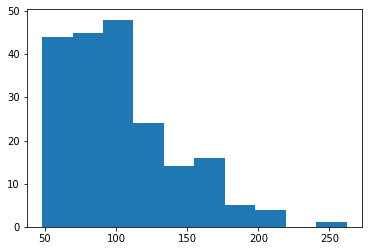

In [15]:
#histogram of the horsepower
plt.hist(df['horsepower'], bins= 10, range=None, weights=None, density=None)
plt.show()

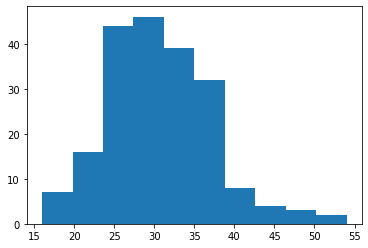

In [16]:
#histogram of the highway-mpg
plt.hist(df['highway-mpg'], bins=10, range=None, weights=None, density=None)
plt.show()

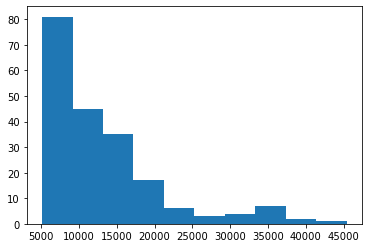

In [17]:
#histogram of the prices
plt.hist(df['price'], bins=10, range=None, weights=None, density=None)
plt.show()

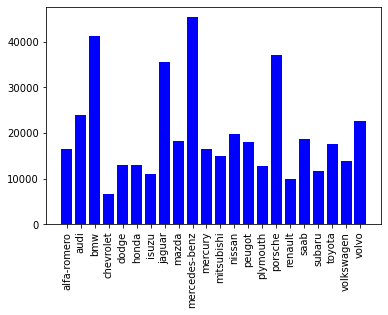

In [18]:
plt.bar(df2['make'], df2['price'], color='blue')
plt.xticks(rotation=90)
plt.show()

Most of the cars horsepower are between 90 and 110 
Most of the cars highway-mpg are between 27 and 32
Most of the cars prices are between 5000 and 80000
The most expensive is car Mercedes-Benz

### 3- Matrix of scatter plots where the data is numerical

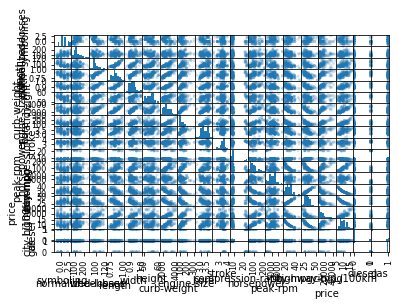

In [19]:

pd.plotting.scatter_matrix(df2.select_dtypes(include=['int64', 'float64']), alpha=0.2)
plt.show()

### 3- More EDA: Look at the correlations between the data    
Use matrix of scatter plots    
Compute a matrix of pearson correlations and display as an image using a heat map interpolation should be nearest    
Tell some data story about your variable based on the relationships potentially predict which ones will work best for you      target variable     
Formulate a refined hypostheisis     


In [20]:
#pearson correlation
car_correlation = df2.corr()
car_correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.453423,-0.533112,-0.359883,-0.242821,-0.539407,-0.226121,-0.055329,-0.142125,-0.013520,-0.180275,0.090778,0.229436,0.004688,0.073359,-0.076420,0.021612,-0.192544,0.192544
normalized-losses,0.453423,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308,-0.096487,0.096487
wheel-base,-0.533112,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050,0.305889,-0.305889
length,-0.359883,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579,0.212484,-0.212484
width,-0.242821,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663,0.251112,-0.251112
height,-0.539407,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120,0.279063,-0.279063
curb-weight,-0.226121,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512,0.228445,-0.228445
engine-size,-0.055329,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696,0.076032,-0.076032
bore,-0.142125,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286,0.055927,-0.055927
stroke,-0.013520,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893,0.240193,-0.240193


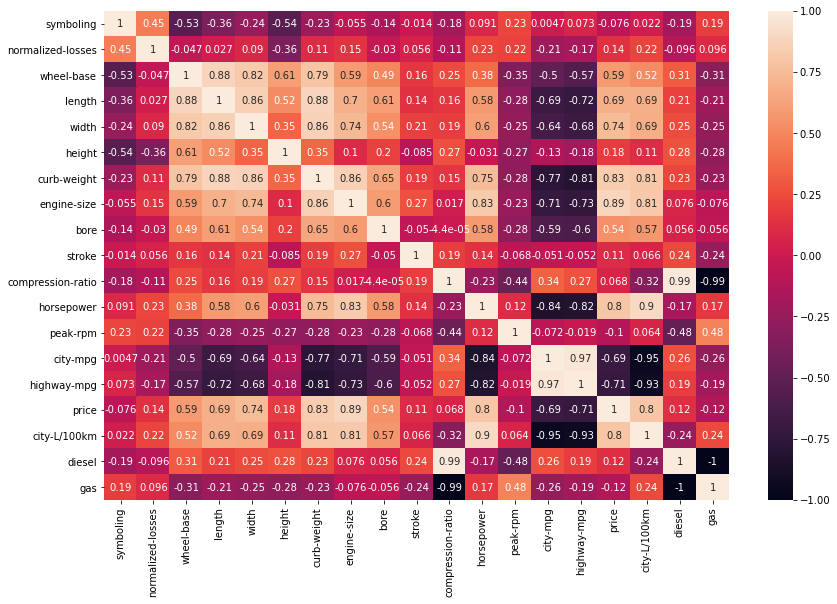

In [21]:
#heat map
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(car_correlation, 
            xticklabels=car_correlation.columns.values,
            yticklabels=car_correlation.columns.values,annot= True)
plt.show()

### Tell a data story

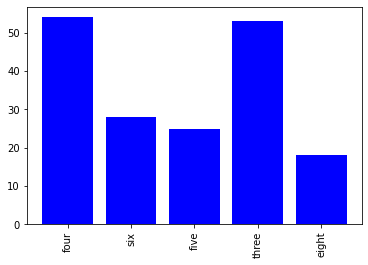

In [22]:
plt.bar(df2['num-of-cylinders'], df2['highway-mpg'], color='blue')
plt.xticks(rotation=90)
plt.show()

Tell some data story about your variable based on the relationships potentially predict which ones will work best for you target variable
Formulate a refined hypostheisis

Based on the heat map, there is a negative correlation between horsepower and fuel consumption in highway miles per gallons. Meaning the higher the Horsepower of a car, the fewer its fuel consumption on highway in miles per gallons.

refined hypothesis:
- Mercedes-benz is the most expensive car among these cars 
- The higher the Horsepower, the less the fuel consumption.
- The higher the num of cylinders, the fewer the fuel consumption on highway in miles per gallons except for cars with three cylinders.

# Part 2

### Logistic regression

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()


##### Observations on Target Variable- Price:

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

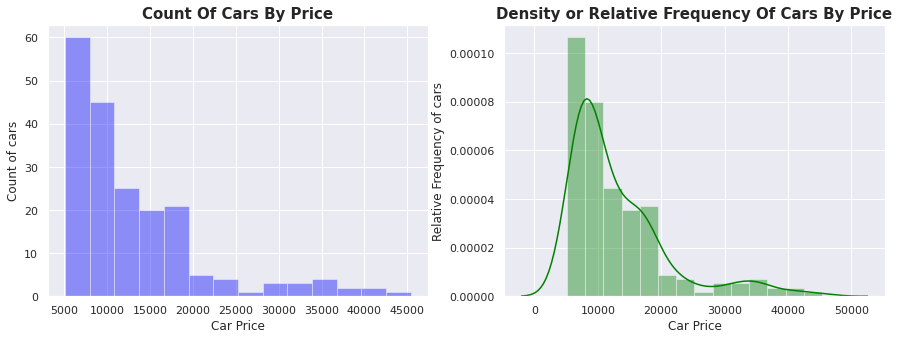

In [24]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df2['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(df2['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

In [25]:
#convert categorical to dummies
dummy_aspiration =pd.get_dummies(df2['aspiration'], drop_first = True)


In [26]:
df2 = pd.concat([df2, dummy_aspiration], axis = 1)
df2.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,Medium,0,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,Medium,0,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500,12.368421,Medium,0,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950,9.791667,Medium,0,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450,13.055556,Medium,0,1,0


In [27]:

#Select only the numerical variables
df2_numeric = df2.select_dtypes(include=['float64', "int64"])
df2_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,0,1


In [28]:
df2_numeric.drop(columns= ['symboling'], inplace = True)


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### You should do an analysis on whether you need to standardize or normalize the data.

In [29]:
df2_numeric.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.00000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,121.428571,98.852041,0.837183,0.914846,53.882143,2551.50000,126.969388,3.329643,3.259439,10.173061,102.472002,5100.258872,25.413265,30.913265,13094.658163,9.819073,0.102041,0.897959
std,32.149650,6.118651,0.059556,0.029181,2.365031,513.79767,38.807468,0.271071,0.318079,4.053371,36.012855,467.021518,6.327606,6.738913,7875.984533,2.426332,0.303477,0.303477
min,65.000000,86.600000,0.678039,0.837500,48.800000,1488.00000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,97.250000,94.500000,0.799135,0.889931,52.000000,2145.00000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,20.000000,25.000000,7765.750000,7.833333,0.000000,1.000000
50%,122.000000,97.000000,0.832292,0.909028,54.100000,2417.00000,120.000000,3.310000,3.290000,9.000000,95.000000,5112.684729,25.000000,30.000000,10096.500000,9.400000,0.000000,1.000000
75%,134.750000,102.400000,0.881788,0.926042,55.625000,2928.25000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000,11.750000,0.000000,1.000000
max,256.000000,120.900000,1.000000,1.000000,59.800000,4066.00000,308.000000,3.940000,4.170000,23.000000,207.000000,6600.000000,49.000000,54.000000,45400.000000,16.785714,1.000000,1.000000


We see that the ranges of the numerical variables differ and they are in different units, espacially price therefore we need to standardize them by substracting the mean and dividing by the standard deviation. We will just use StandardScaler 

#### Set the target variable

In [30]:
x=df2_numeric.drop(columns=['price'])
y=df2_numeric['price']

#### Split the data into train and test sets

In [31]:
# split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
 

#### data standardization

all numeric cols have pretty much mean = 0  and standard deviation = 1

In [32]:
sc= StandardScaler ()
x_train=sc.fit_transform (x_train)
x_test=sc.fit_transform (x_test)

#### Apply logistic regression

In [33]:
classifier=LogisticRegression ()
classifier.fit (x_train, y_train)

y_pred=classifier.predict(x_test)

##### Accuracy scores

In [34]:
from sklearn.metrics import accuracy_score
#score of the train set
score = classifier.score(x_train, y_train)
print(score)

0.7372262773722628


In [35]:
#score of the train set
score = classifier.score(x_train, y_train)
print(score)

0.7372262773722628


In [36]:
#score of the test set
score = classifier.score(x_test, y_test)
print(score)

0.03389830508474576


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        5389       0.00      0.00      0.00         1
        5572       0.00      0.00      0.00         0
        6189       0.00      0.00      0.00         1
        6229       0.00      0.00      0.00         1
        6295       0.00      0.00      0.00         1
        6479       0.00      0.00      0.00         1
        6529       0.00      0.00      0.00         0
        6575       0.00      0.00      0.00         1
        6669       0.00      0.00      0.00         0
        6692       0.00      0.00      0.00         2
        6785       0.00      0.00      0.00         1
        6855       0.00      0.00      0.00         1
        6918       0.00      0.00      0.00         0
        7099       0.00      0.00      0.00         1
        7126       0.00      0.00      0.00         1
        7295       1.00      1.00      1.00         1
        7349       0.00      0.00      0.00         1
        7463       0.00    

/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

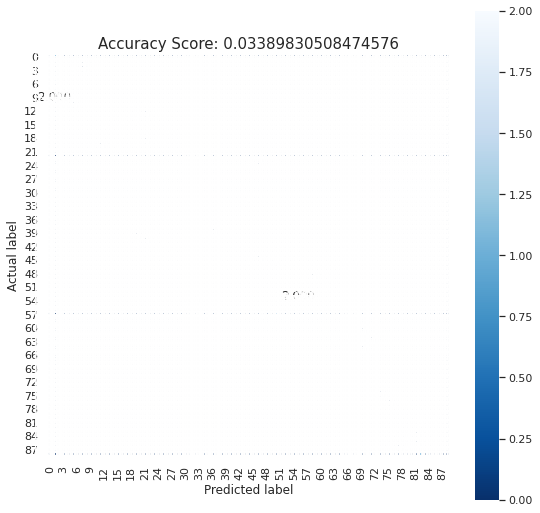

In [43]:
#confusion matrix as a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        5389       0.00      0.00      0.00         1
        5572       0.00      0.00      0.00         0
        6189       0.00      0.00      0.00         1
        6229       0.00      0.00      0.00         1
        6295       0.00      0.00      0.00         1
        6479       0.00      0.00      0.00         1
        6529       0.00      0.00      0.00         0
        6575       0.00      0.00      0.00         1
        6669       0.00      0.00      0.00         0
        6692       0.00      0.00      0.00         2
        6785       0.00      0.00      0.00         1
        6855       0.00      0.00      0.00         1
        6918       0.00      0.00      0.00         0
        7099       0.00      0.00      0.00         1
        7126       0.00      0.00      0.00         1
        7295       1.00      1.00      1.00         1
        7349       0.00      0.00      0.00         1
        7463       0.00    

##### Interpretation: 
From our classification report we can see that our model has a Recall rate of 0 has a precision of 0%. Our model is performing poorly.

##### Use correlation or the scatter plot to make your guess on the weakest one.

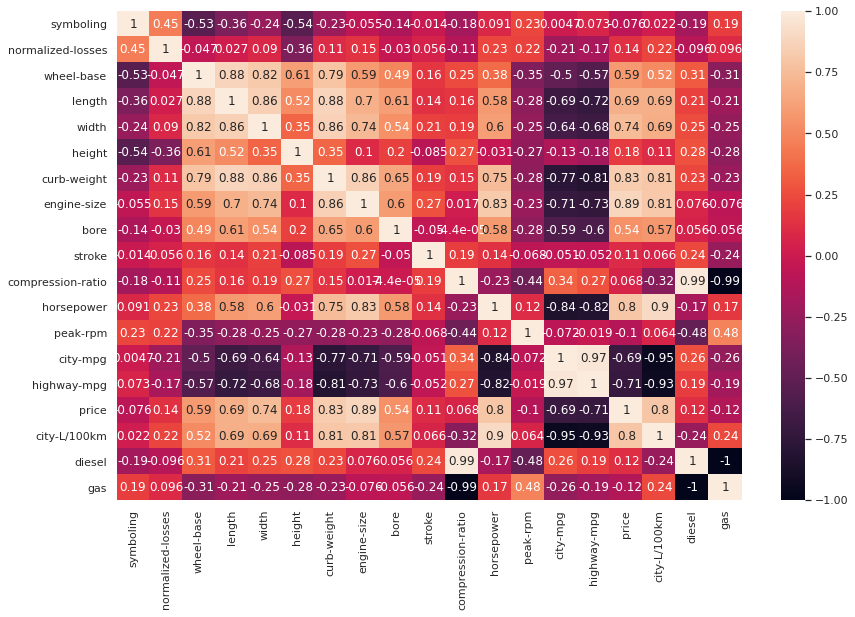

In [41]:
#correlation matrix as heat map
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(car_correlation, 
            xticklabels=car_correlation.columns.values,
            yticklabels=car_correlation.columns.values,annot= True)
plt.show()

from the heatmap we see that gas, diesel, compression ratio, stroke, height and normalized losses are barely correlated with price so we will drop them

##### Dropping gas, diesel, compression ratio, stroke, height and normalized losses

In [40]:
x1 = x.drop(['gas', 'diesel', 'compression-ratio', 'stroke', 'height', 'normalized-losses'], axis=1)

In [41]:
# split into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.3, random_state=42)

In [42]:
sc= StandardScaler ()

x1_train=sc.fit_transform (x1_train)
x1_test=sc.transform (x1_test)
classifier
classifier=LogisticRegression (random_state=0)
classifier.fit (x1_train, y1_train)
LogisticRegression(random_state=0)
y1_pred=classifier.prerain=sc.fit_transform (x1_train)
x1_test=sc.transform (x1_test)

In [43]:
classifier=LogisticRegression (random_state=0)
classifier.fit (x1_train, y1_train)
y1_pred=classifier.predict (x1_test)

##### Accuracy scores

In [44]:
#score of the train set
score = classifier.score(x1_train, y1_train)
print(score)
#0.7372262773722628

0.5474452554744526


In [45]:
#score of the test set
score = classifier.score(x1_test, y1_test)
print(score)
#0.03389830508474576

0.01694915254237288


##### confusion matrix

In [46]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y1_test, y1_pred)
confusion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

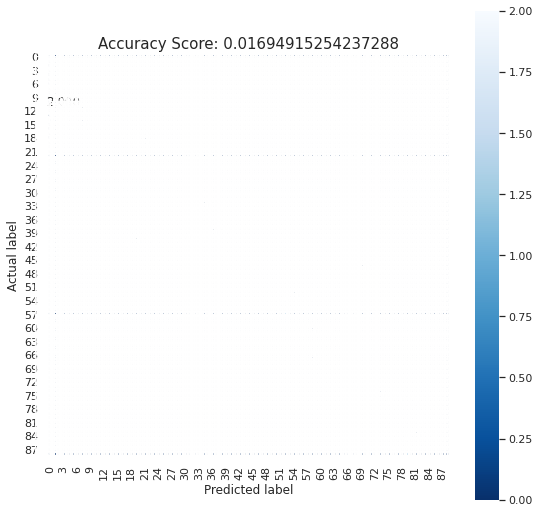

In [47]:
#confusion matrix as a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title( all_sample_title,size = 15);

##### classification report

In [48]:

from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

        5118       0.00      0.00      0.00         0
        5151       0.00      0.00      0.00         0
        5389       0.00      0.00      0.00         1
        5572       0.00      0.00      0.00         0
        6189       0.00      0.00      0.00         1
        6229       0.00      0.00      0.00         1
        6295       0.00      0.00      0.00         1
        6479       0.00      0.00      0.00         1
        6529       0.00      0.00      0.00         0
        6575       0.00      0.00      0.00         1
        6692       0.00      0.00      0.00         2
        6785       0.00      0.00      0.00         1
        6855       0.00      0.00      0.00         1
        7099       0.00      0.00      0.00         1
        7126       0.00      0.00      0.00         1
        7295       0.00      0.00      0.00         1
        7349       0.00      0.00      0.00         1
        7463       0.00    

/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interpretation:
From our classification report we can see that our model has a Recall rate of 0 has a precision of 0%. Our model is performing poorly.

### Check how it does with only the strongest 2 of the features

##### Setting the target variable

In [60]:
x2 = df2_numeric['engine-size'].values.reshape(-1,1)
y2 = df2_numeric['price'].values.reshape(-1,1)


In [61]:
#data standardization
from sklearn.preprocessing import StandardScaler 

# create the scaler 
StandardScaler().fit_transform(x2)


array([[ 0.07829352],
       [ 0.07829352],
       [ 0.64664645],
       [-0.46422519],
       [ 0.23329886],
       [ 0.23329886],
       [ 0.23329886],
       [ 0.23329886],
       [ 0.10412774],
       [-0.49005941],
       [-0.49005941],
       [ 0.95665713],
       [ 0.95665713],
       [ 0.95665713],
       [ 2.11919722],
       [ 2.11919722],
       [ 2.11919722],
       [-1.70426795],
       [-0.95507545],
       [-0.95507545],
       [-0.95507545],
       [-0.95507545],
       [-0.74840165],
       [-0.95507545],
       [-0.95507545],
       [-0.95507545],
       [-0.74840165],
       [-0.12838028],
       [ 0.74998334],
       [-0.903407  ],
       [-0.903407  ],
       [-1.23925191],
       [-0.903407  ],
       [-0.903407  ],
       [-0.903407  ],
       [-0.903407  ],
       [-0.43839097],
       [-0.43839097],
       [-0.43839097],
       [-0.43839097],
       [-0.43839097],
       [-0.43839097],
       [-0.41255674],
       [-0.20588295],
       [ 3.3850742 ],
       [ 3

##### Split the data into train and test sets

In [62]:
# split into train and test
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)

In [63]:
sc= StandardScaler ()

x2_train=sc.fit_transform (x2_train)
x2_test=sc.fit_transform (x2_test)

In [71]:
classifier=LogisticRegression (random_state=0)
classifier.fit (x2_train, y2_train)


x2_test=sc.transform (x2_test)

y2_pred=classifier.predict (x2_test)


/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
#score of the train set
score = classifier.score(x2_train, y2_train)
print(score)

0.0364963503649635


In [67]:
#score of the test set
score = classifier.score(x2_test, y2_test)
print(score)

0.0


##### confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y2_test, y2_pred)
confusion

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])